In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

/Users/jeff/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def readMODELnc(filename, var):
    """ 
    Read a variable from a NEMO output (netcdf 3 or 4)
    """

    f = netcdf.netcdf_file(filename, 'r')
    data = f.variables[var].data
    f.close()

    return data


In [3]:
path = 'Moorings_' # Jeff's path for the downloaded data
location ='ST2'

In [12]:
filename = path+'AMM60/mooring_'+location+'.nc'
temp_obs = readMODELnc(filename,'temp_obs')
temp_mod = readMODELnc(filename,'temp_mod')
depth = readMODELnc(filename,'depth')

mask = np.isfinite(temp_mod)
xi = np.arange(len(temp_mod))

print(temp_mod.shape[0])

temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
temp_obs_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
for ii in range(0,temp_mod.shape[0]-1):
    x = temp_mod[ii,:]
    mask = np.isfinite(x)
    xi = np.arange(len(x))
    xfiltered = np.interp(xi, xi[mask], x[mask])
    temp_mod_noNaN[ii,:] = xfiltered
    x = temp_obs[ii,:]
    mask = np.isfinite(x)
    xi = np.arange(len(x))
    xfiltered = np.interp(xi, xi[mask], x[mask])
    temp_obs_noNaN[ii,:] = xfiltered


depth_thermocline_mod = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
depth_thermocline_obs = depth[np.argmin(abs(temp_obs_noNaN-13),axis=0)]

Tlen = len(depth_thermocline_mod)
print(temp_mod.shape)
print(depth_thermocline_mod.shape)

51


ValueError: array of sample points is empty

In [11]:
## source https://fr.mathworks.com/matlabcentral/answers/64114-fft-code-on-time-series

Fs = np.divide(1.,3600.) # 1 cycle per hour, so every 3600 sec.
L = Tlen
N = np.ceil(np.log2(L))
f = np.multiply(Fs/np.power(2,N),range(0,int(np.power(2,N-1)-1)))

win_hanning = np.hanning(L)
inv_hanning = np.sqrt(np.sum(np.square(win_hanning[:np.floor(L/2)],win_hanning[:np.floor(L/2)])))

mod_norm = np.divide(np.multiply(win_hanning,depth_thermocline_mod),inv_hanning)
obs_norm = np.divide(np.multiply(win_hanning,depth_thermocline_obs),inv_hanning)

FFTmod = np.fft.fft(mod_norm,int(np.power(2,N)))
fft_real_mod_amm60 = np.multiply(FFTmod,np.conj(FFTmod))
FFTobs = np.fft.fft(obs_norm,int(np.power(2,N)))
fft_real_obs_amm60 = np.multiply(FFTobs,np.conj(FFTobs))

famm60 = f
fftamm60 = fft_real_mod_amm60[0:int(np.power(2,N-1)-1)]
fftobsamm60 = fft_real_obs_amm60[0:int(np.power(2,N-1)-1)]

%matplotlib inline
plt.semilogy(famm60,fftobsamm60,color='b')
plt.hold()
plt.semilogy(famm60,fftamm60,color='r')

print(fftamm60.shape)


NameError: name 'Tlen' is not defined

In [ ]:
filename = path+'AMM7/mooring_'+location+'.nc'
temp_obs = readMODELnc(filename,'temp_obs')
temp_mod = readMODELnc(filename,'temp_mod')
depth = readMODELnc(filename,'depth')

mask = np.isfinite(temp_mod)
xi = np.arange(len(temp_mod))
#xfiltered = np.inte(xi, xi[mask], temp_mod[mask])

print(temp_mod.shape[0])

temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
temp_obs_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
for ii in range(0,47):
    x = temp_mod[ii,:]
    mask = np.isfinite(x)
    xi = np.arange(len(x))
    xfiltered = np.interp(xi, xi[mask], x[mask])
    temp_mod_noNaN[ii,:] = xfiltered
    x = temp_obs[ii,:]
    mask = np.isfinite(x)
    xi = np.arange(len(x))
    xfiltered = np.interp(xi, xi[mask], x[mask])
    temp_obs_noNaN[ii,:] = xfiltered


depth_thermocline_mod = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
depth_thermocline_obs = depth[np.argmin(abs(temp_obs_noNaN-13),axis=0)]

Tlen = len(depth_thermocline_mod)

In [5]:
## source https://fr.mathworks.com/matlabcentral/answers/64114-fft-code-on-time-series

Fs = np.divide(1.,3600.) # 1 cycle per hour, so every 3600 sec.
L = Tlen
N = np.ceil(np.log2(L))
f = np.multiply(Fs/np.power(2,N),range(0,int(np.power(2,N-1)-1)))

win_hanning = np.hanning(L)
inv_hanning = np.sqrt(np.sum(np.square(win_hanning[:np.floor(L/2)],win_hanning[:np.floor(L/2)])))


mod_norm = np.divide(np.multiply(win_hanning,depth_thermocline_mod),inv_hanning)
obs_norm = np.divide(np.multiply(win_hanning,depth_thermocline_obs),inv_hanning)

FFTmod = np.fft.fft(mod_norm,int(np.power(2,N)))
fft_real_mod_amm7 = np.multiply(FFTmod,np.conj(FFTmod))
FFTobs = np.fft.fft(obs_norm,int(np.power(2,N)))
fft_real_obs_amm7 = np.multiply(FFTobs,np.conj(FFTobs))


famm7 = f
fftamm7 = fft_real_mod_amm7[0:int(np.power(2,N-1)-1)]
fftobsamm7 = fft_real_obs_amm7[0:int(np.power(2,N-1)-1)]

%matplotlib inline
plt.semilogy(famm7,fftobsamm7,color='b')
plt.hold()
plt.semilogy(famm7,fftamm7,color='r')


NameError: name 'Tlen' is not defined

In [6]:
filename = path+'NNA/mooring_'+location+'.nc'
#temp_obs = readMODELnc(filename,'temp_obs')[:,3800:4200]
temp_mod = readMODELnc(filename,'temp_mod')[:,3800:4200]
depth = readMODELnc(filename,'depth')

mask = np.isfinite(temp_mod)
xi = np.arange(len(temp_mod))
#xfiltered = np.inte(xi, xi[mask], temp_mod[mask])
temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
temp_obs_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
for ii in range(0,53):
    x = temp_mod[ii,:]
    mask = np.isfinite(x)
    xi = np.arange(len(x))
    xfiltered = np.interp(xi, xi[mask], x[mask])
    temp_mod_noNaN[ii,:] = xfiltered
    #x = temp_obs[ii,:]
    #mask = np.isfinite(x)
    #xi = np.arange(len(x))
    #print(xi, xi[mask], x[mask])
    #xfiltered = np.interp(xi, xi[mask], x[mask])
    #temp_obs_noNaN[ii,:] = xfiltered


depth_thermocline_mod = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
#depth_thermocline_obs = depth[np.argmin(abs(temp_obs_noNaN-13),axis=0)]

Tlen = len(depth_thermocline_mod)

ValueError: array of sample points is empty

In [7]:
## source https://fr.mathworks.com/matlabcentral/answers/64114-fft-code-on-time-series

Fs = np.divide(1.,3600.) # 1 cycle per hour, so every 3600 sec.
L = Tlen
N = np.ceil(np.log2(L))
f = np.multiply(Fs/np.power(2,N),range(0,int(np.power(2,N-1)-1)))

win_hanning = np.hanning(L)
inv_hanning = np.sqrt(np.sum(np.square(win_hanning[:np.floor(L/2)],win_hanning[:np.floor(L/2)])))


mod_norm = np.divide(np.multiply(win_hanning,depth_thermocline_mod),inv_hanning)

FFTmod = np.fft.fft(mod_norm,int(np.power(2,N)))
fft_real_mod_nna = np.multiply(FFTmod,np.conj(FFTmod))
#FFTobs = np.fft.fft(depth_thermocline_obs,int(np.power(2,N)))
#fft_real_obs_nna = np.multiply(FFTobs,np.conj(FFTobs))


fnna = f
fftnna = fft_real_mod_nna[0:int(np.power(2,N-1)-1)]
#fftobsnna = fft_real_obs_nna[0:int(np.power(2,N-1)-1)]

%matplotlib inline
#plt.semilogy(fnna,fftobsnna,color='b')
plt.hold()
plt.semilogy(fnna,fftnna,color='r')

NameError: name 'Tlen' is not defined

NameError: name 'famm60' is not defined

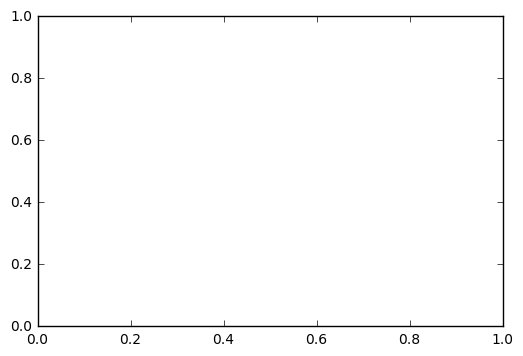

In [8]:
%matplotlib inline
#plt.semilogy(fnna,fftobsnna,color='g')
plt.hold()
plt.semilogy(famm60,fftobsamm60,color='b')
plt.semilogy(famm7,fftobsamm7,color='r')
plt.hold()






In [9]:
%matplotlib
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.semilogy(famm60,fftobsamm60,color='k')
plt.hold()
plt.semilogy(fnna,fftnna,color='g')
plt.semilogy(famm60,fftamm60,color='b')
plt.semilogy(famm7,fftamm7,color='r')


period_hrs = 12.42; lineformat = 'r--'; label='M2'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)
#ax.text(1/(3600*period_hrs), 1E6, label)

period_hrs = 12.00; lineformat = 'y--'; label='S2'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 25.82; lineformat = 'b--'; label='O1'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 23.93; lineformat = 'k--'; label='K1'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 12.66; lineformat = 'b--'; label='N2'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 24.07; lineformat = 'r--'; label='P1'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 12.19; lineformat = 'g--'; label='L2'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

period_hrs = 6.21; lineformat = 'g--'; label='M4'
plt.semilogy( [1/(3600*period_hrs), 1/(3600*period_hrs)], [1E-2, 1E7], lineformat)

plt.xlim([0,5E-5])
plt.title(location)

plt.savefig(location+'.png')


Using matplotlib backend: MacOSX


NameError: name 'famm60' is not defined